## Machine Learning Lab

In [1]:
# Libraries for path management and data analysis
import os
import pandas as pd

In [2]:
# Changing directory
os.chdir("..")

In [3]:
# Loading the data
data = pd.read_csv("data/churn.csv")

In [4]:
# Exploring the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Getting rid of the columns that don't contribute 
data = data.drop(data.columns[0:3], axis=1)

In [7]:
# Converting the categorical data format to numeric, for more info: https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/
column_equivalence = {}
features = list(data.columns)
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        categorical_column = data[data.columns[i]].astype("category")
        column_equivalence[i] = dict(enumerate(categorical_column.cat.categories))
        data[data.columns[i]] = categorical_column.cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [8]:
column_equivalence

{1: {0: 'France', 1: 'Germany', 2: 'Spain'}, 2: {0: 'Female', 1: 'Male'}}

In [9]:
# Reversing the equivalence key:value of the dictionaries in column_equivalence
ce = {}
for i in column_equivalence:
    ce[i] = {y:x for (x,y) in column_equivalence[i].items()}
ce

{1: {'France': 0, 'Germany': 1, 'Spain': 2}, 2: {'Female': 0, 'Male': 1}}

In [10]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


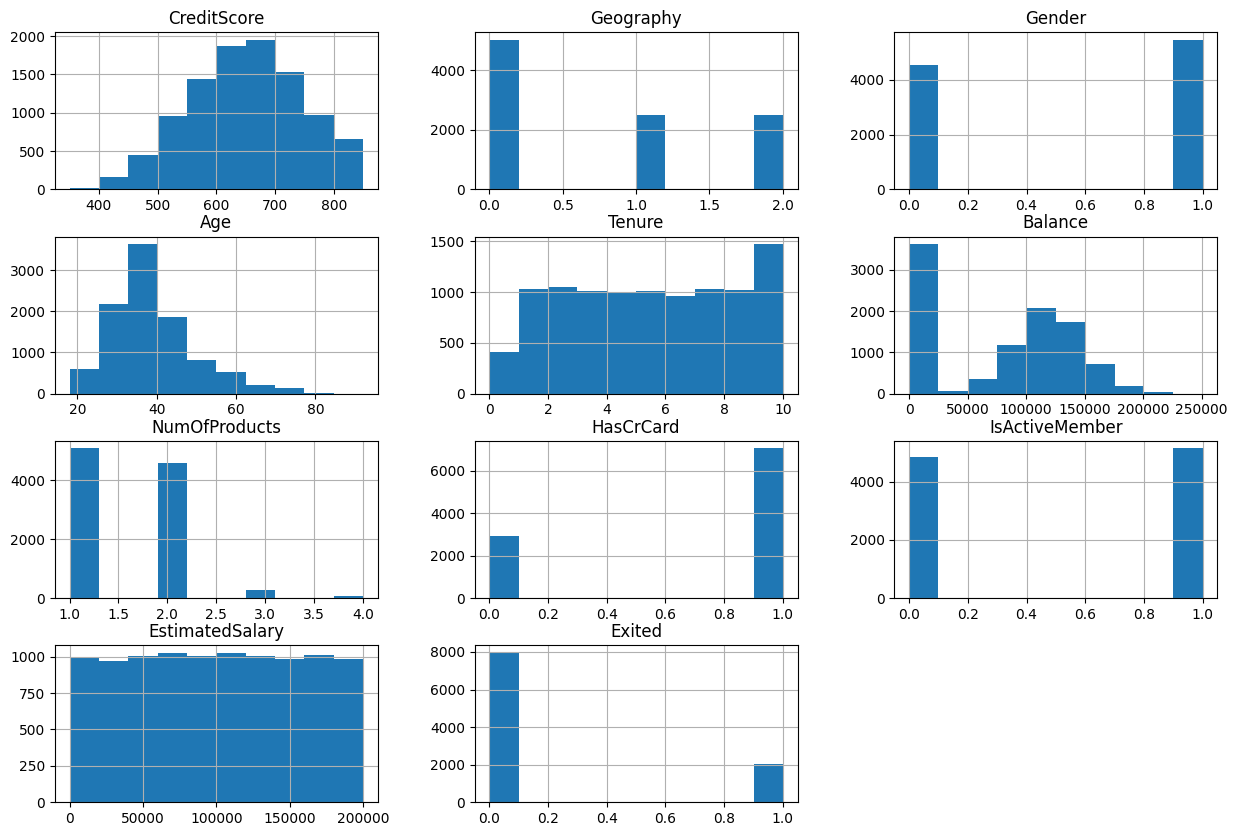

In [11]:
data.hist(figsize=(15,10));

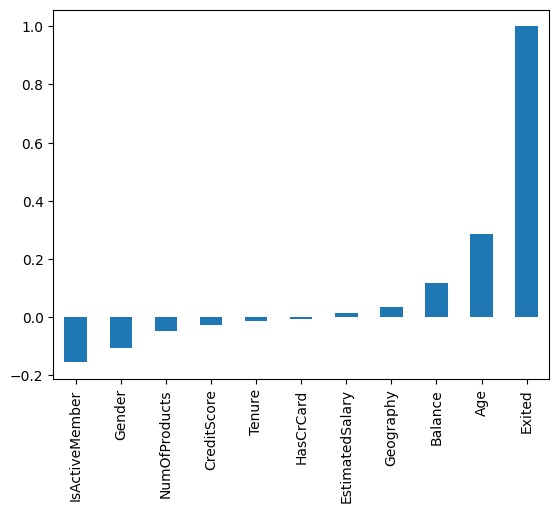

In [12]:
# Studying correlations with respect to the target varible (Exited).
import matplotlib.pyplot as plt
data.corr()['Exited'].sort_values(ascending=True).plot(kind='bar')
plt.show()

### Modeling and training

In [13]:
# Libraries for importing the data and creating the Logistic Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
#  Generating the data to separate the response variable from the original data
X = data.drop(data.columns[-1], axis=1)
y = data.pop(data.columns[-1])

In [15]:
# Separating data into training and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [16]:
# Creating and training the model. After some proves you can check that 'newton-cg' solver has a better performance
clf_lin =  LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X, y)

/home/ling/laboratorio-machine-learning/venv/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ling/laboratorio-machine-learning/venv/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ling/laboratorio-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


### Metrics and state of the model

In [17]:
# Measuring the results
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, clf_lin.predict(X_test))


array([[2595,   62],
       [ 538,  105]])

In [18]:
accuracy_score(y_test, clf_lin.predict(X_test))

0.8181818181818182

In [19]:
# Saving binaries for the reusing of the model, the equivalence of categorical variables, and the model features 

import pickle
pickle.dump(clf_lin, open("churn/models/model.pk", "wb"))
pickle.dump(ce, open("churn/models/column_equivalence.pk", "wb"))
pickle.dump(features, open("churn/models/features.pk", "wb"))

### Testing other algoritms

In [20]:
from sklearn import svm

svm_model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)

In [21]:
svm_model.fit(X_train, y_train)

In [ ]:
y_svm = svm_model.predict(X_test)

In [ ]:
score = accuracy_score(y_svm, y_test)
print(score)